## Final Project Submission

Please fill out:
* Student name: David Cuervo
* Student pace: self paced 
* Scheduled project review date/time: 2/5/2020 ; 5:30PM CST
* Instructor name: Jeff Herman
* Blog post URL:


# Approach

    To develop a model that predicts the sales price of a house in King County, I'll start by reviewing and cleaning the data. This includes reviewing the data types, dealing with missing data points, and reviewing the distribution of each variable. Then, I'll begin my EDA by creating visualizations of each variable to determine which would be appropriate to incorporate in my model. Finally, I will select the features I want to include in the model, making sure to remove those that cause multicollinearity. I'll adjust the model to improve the R-square and then come to a final model. 

### Data Review and Cleaning

In [1]:
#Importing libraries and reading in the data set

import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
plt.style.use('seaborn')

df = pd.read_csv('kc_house_data.csv')

In [2]:
#Reviewing the data
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
#It looks like there's a variable in between view and grade so I want to see all the variables with .info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [4]:
#I want to convert sqft_basement to a numeric value for analysis
df['sqft_basement'] = df['sqft_basement'].astype(float)

# Couldn't convert sqft_basement to a numeric variable

ValueError: could not convert string to float: '?'

In [6]:
#After looking through this variable, some '?'s were found which explains why I couldn't convert the variable 
df['sqft_basement'].head(30)

0        0.0
1      400.0
2        0.0
3      910.0
4        0.0
5     1530.0
6          ?
7        0.0
8      730.0
9        0.0
10    1700.0
11     300.0
12       0.0
13       0.0
14       0.0
15     970.0
16       0.0
17       0.0
18         ?
19       0.0
20     760.0
21     720.0
22       0.0
23       0.0
24       0.0
25       0.0
26     700.0
27       0.0
28     730.0
29       0.0
Name: sqft_basement, dtype: object

In [7]:
#Checking to see how many '?'s are in this variable
df['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
2360.0        1
704.0         1
283.0         1
207.0         1
2500.0        1
Name: sqft_basement, Length: 304, dtype: int64

In [8]:
#Created a new dataset to find the mean and median of sqft_basement without the '?'s
basement_no_q = df[df.sqft_basement != '?']
basement_no_q.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [9]:
#Checking to see if it worked
basement_no_q['sqft_basement'].value_counts()

0.0       12826
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
207.0         1
704.0         1
516.0         1
4820.0        1
2180.0        1
Name: sqft_basement, Length: 303, dtype: int64

In [10]:
#Converted sqft_basement to float
basement_no_q['sqft_basement'] = basement_no_q['sqft_basement'].astype(float)

/Users/davidcuervo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
#Checking to see if it worked
basement_no_q.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21143 entries, 0 to 21596
Data columns (total 21 columns):
id               21143 non-null int64
date             21143 non-null object
price            21143 non-null float64
bedrooms         21143 non-null int64
bathrooms        21143 non-null float64
sqft_living      21143 non-null int64
sqft_lot         21143 non-null int64
floors           21143 non-null float64
waterfront       18804 non-null float64
view             21082 non-null float64
condition        21143 non-null int64
grade            21143 non-null int64
sqft_above       21143 non-null int64
sqft_basement    21143 non-null float64
yr_built         21143 non-null int64
yr_renovated     17389 non-null float64
zipcode          21143 non-null int64
lat              21143 non-null float64
long             21143 non-null float64
sqft_living15    21143 non-null int64
sqft_lot15       21143 non-null int64
dtypes: float64(9), int64(11), object(1)
memory usage: 3.5+ MB


In [12]:
#Checking the mean and median of sqft_basement
basement_no_q.describe()
#mean = 291.851724 ; median = 0

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.114300e+04,2.114300e+04,21143.000000,21143.000000,21143.000000,2.114300e+04,21143.000000,18804.000000,21082.000000,21143.000000,21143.000000,21143.000000,21143.000000,21143.000000,17389.000000,21143.000000,21143.000000,21143.000000,21143.00000,21143.000000
mean,4.581004e+09,5.405107e+05,3.372558,2.116079,2080.920730,1.508714e+04,1.493591,0.007552,0.233327,3.409923,7.658279,1789.069006,291.851724,1971.023223,82.991949,98077.868893,47.560274,-122.213876,1987.27139,12738.941967
std,2.876328e+09,3.680751e+05,0.924917,0.768531,918.547562,4.120920e+04,0.539249,0.086573,0.765066,0.650498,1.174253,828.409769,442.498337,29.321938,398.481819,53.535756,0.138591,0.140597,685.67034,27169.273663
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.00000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.043000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1952.000000,0.000000,98033.000000,47.471250,-122.328000,1490.00000,5100.000000
50%,3.904940e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.572000,-122.230000,1840.00000,7626.000000
75%,7.309100e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.069550e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98117.000000,47.678200,-122.125000,2360.00000,10087.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.00000,871200.000000


In [13]:
#I don't want to drop the rows containing '?' and lose the data so I will 
#replace the '?'s in the original dataset with the mean

df['sqft_basement'] = df['sqft_basement'].replace('?', '292')

In [14]:
#Checking to see if it worked
df['sqft_basement'].value_counts()

0.0       12826
292         454
600.0       217
500.0       209
700.0       208
          ...  
2730.0        1
1008.0        1
792.0         1
946.0         1
602.0         1
Name: sqft_basement, Length: 304, dtype: int64

In [15]:
#Check for other missing values
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

# Q1: What is the distribution of each variable?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c1cd37350>,
      dtype=object)

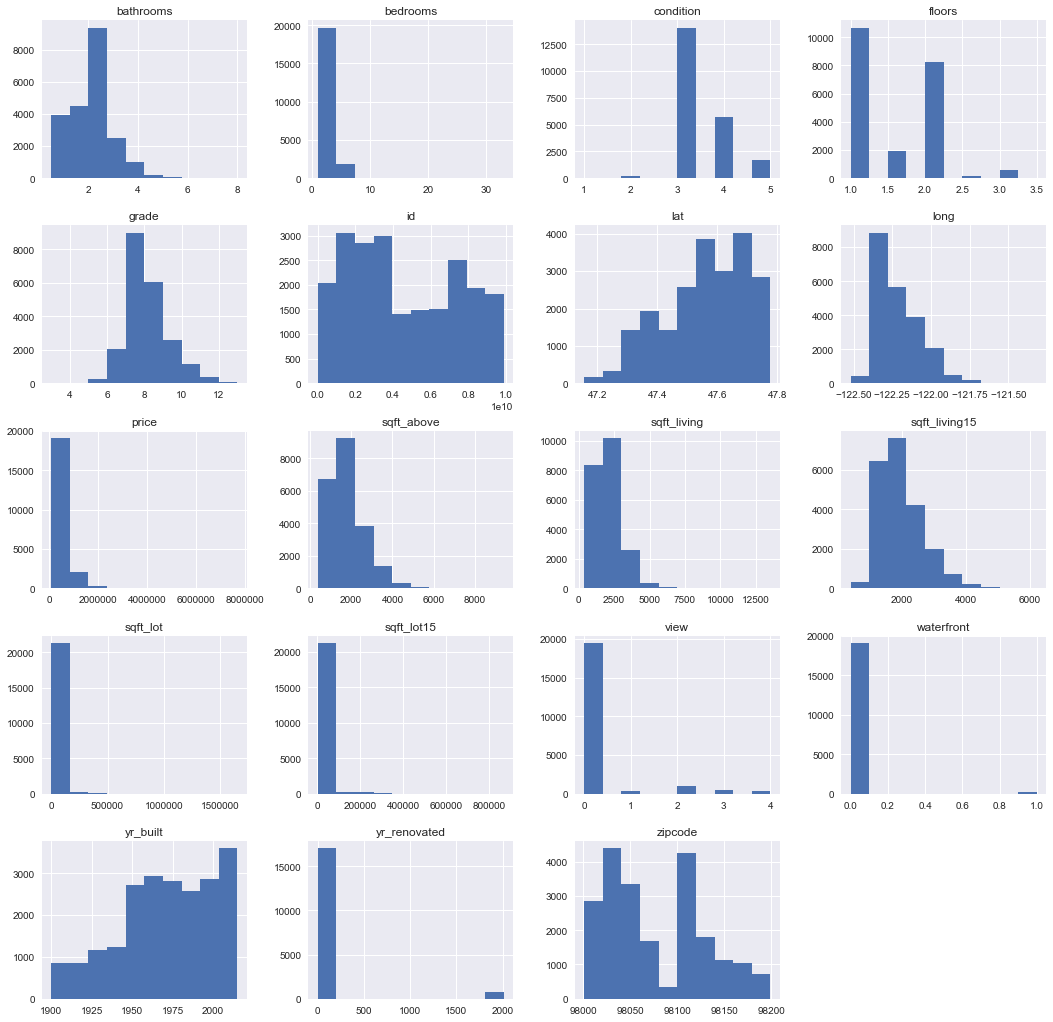

In [16]:
#I'll use histograms to check the distribution of each variable so I can deal with the
#respective missing values properly
df.hist(figsize=(18,18))

### Q1:Answer

By looking at these histograms, I have a better idea of the details of each variable. Categorical variables are seen more clearly like condition, view, and waterfront. 

In [17]:
#Waterfront and view are categorical variables so I will just replace the missing values with 0

df['waterfront'] = df['waterfront'].fillna(value=0)
df['view'] = df['view'].fillna(value=0)

In [18]:
#Checking to see if it worked
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [19]:
#Since the mean of yr_renovated is relatively very low, 82, I will just replace its missing values with 0

df['yr_renovated'] = df['yr_renovated'].fillna(value=0)
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [20]:
#Checking for duplicates in the dataset

duplicates = df[df.duplicated()]
print(len(duplicates))
duplicates.head()

0


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


### Exploratory Data Analysis 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c1e526ad0>,
      dtype=object)

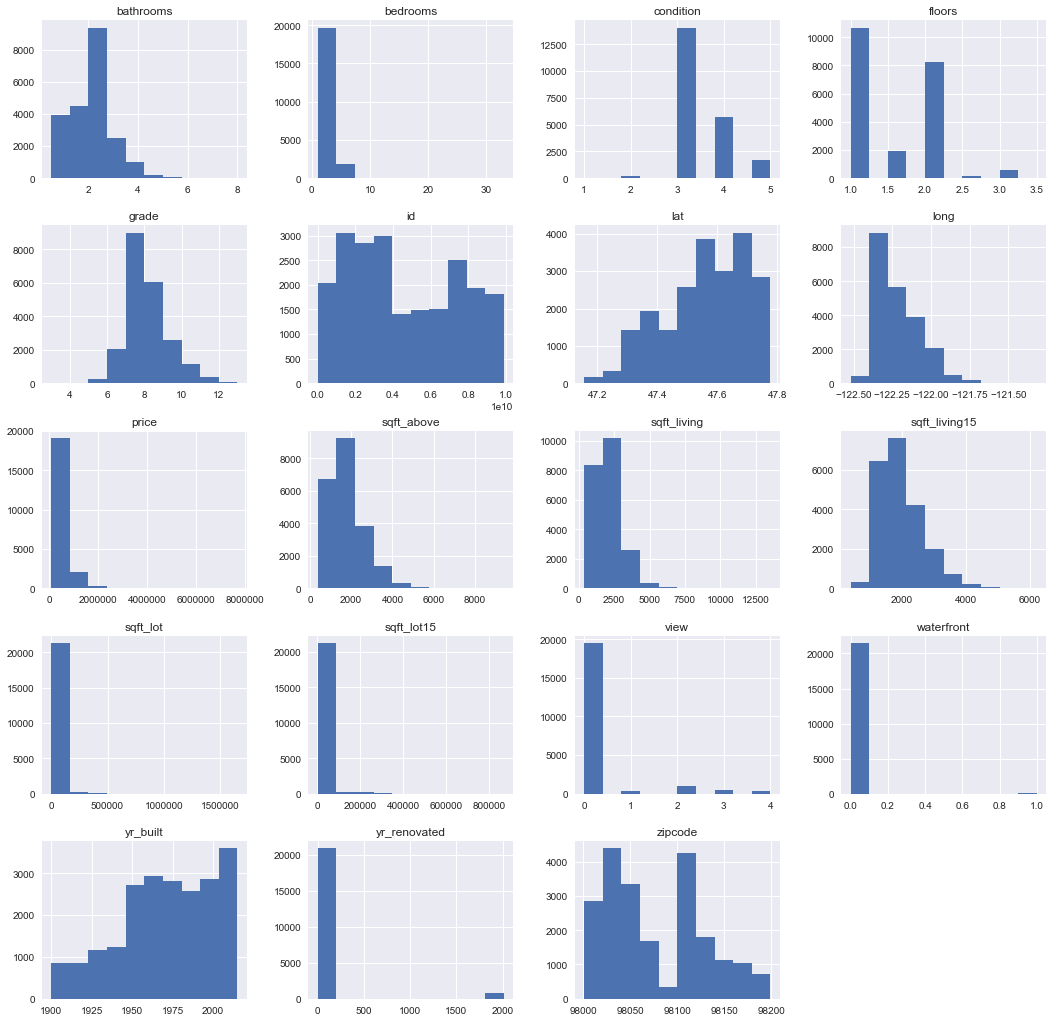

In [21]:
#Check the distribution of variables again now that the data has been cleaned
df.hist(figsize=(18,18))

## Q2: Are any of the categorical variables good predictors for price?

[Text(0.5, 1.0, 'Floors and Sale Price')]

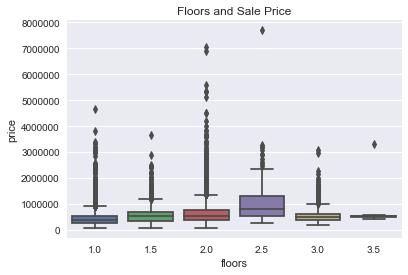

In [22]:
#I'll create a box plot for floors, condition, views, waterfront, grade and price
import seaborn as sns
sns.boxplot(x="floors", y="price", data=df).set(title='Floors and Sale Price')

#It appears that price increases with floors until 2.5 and then drops. 

[Text(0.5, 1.0, 'Condition and Sale Price')]

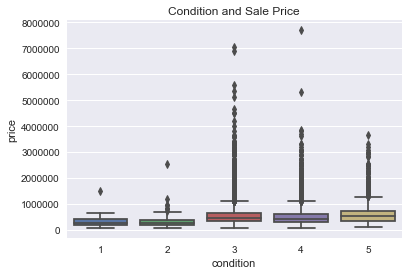

In [23]:
sns.boxplot(x='condition', y='price', data=df).set(title='Condition and Sale Price')

#There is a slight increase in price as the condition improves. However, the condition does not
#seem to influence price past condition 3.

[Text(0.5, 1.0, 'Views and Sale Price')]

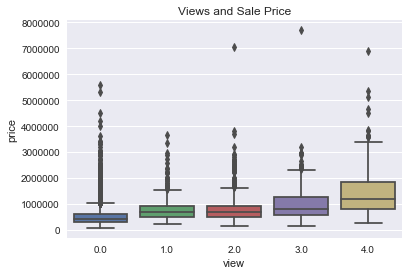

In [24]:
sns.boxplot(x='view', y='price', data=df).set(title='Views and Sale Price')

#There is a clear increase in price as the number of views increases. It would be worth 
#including it in my model

[Text(0.5, 1.0, 'Waterfront and Sale Price')]

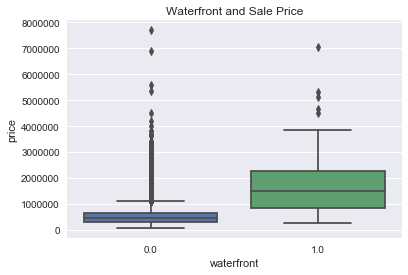

In [25]:
sns.boxplot(x='waterfront', y='price', data=df).set(title='Waterfront and Sale Price')

#As expected, a waterfront property will be more expensive. 

[Text(0.5, 1.0, 'Grade and Sale Price')]

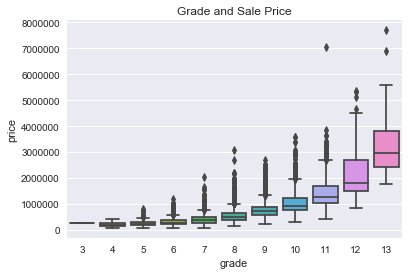

In [26]:
sns.boxplot(x='grade', y='price', data=df).set(title='Grade and Sale Price')

#It appears that the King County grading system could be a great predictor for price

### Q2: Answer

Based on these box plots, views, waterfront, and grade show a clear linear relationship with price and would be appropriate to include in my regression model. 

## Q3: Which of the continuous variables would be good predictors for sale price?

[Text(0.5, 1.0, 'Number of Bathrooms and Sale Price')]

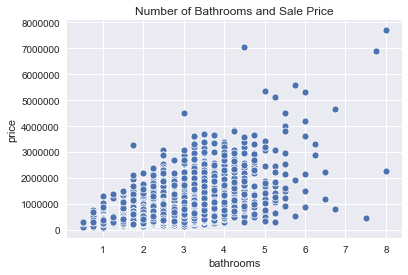

In [27]:
#I'll create scatter plots to see the relationships between price and the continuous variables
#I'll exclude variables that will not be useful in a linear regression model like id and zip code 

sns.scatterplot(x='bathrooms', y='price', data=df).set(title='Number of Bathrooms and Sale Price')

[Text(0.5, 1.0, 'Number of Bedrooms and Sale Price')]

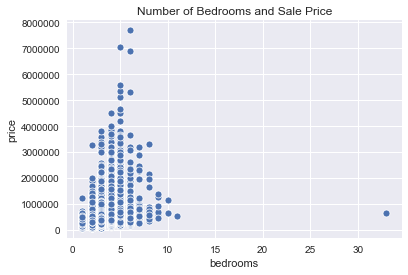

In [28]:
sns.scatterplot(x='bedrooms', y='price', data=df).set(title='Number of Bedrooms and Sale Price')

[Text(0.5, 1.0, 'Square Feet Above the Basement and Sale Price')]

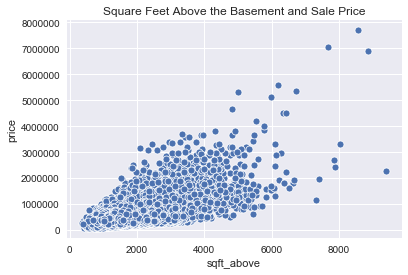

In [29]:
sns.scatterplot(x='sqft_above', y='price', data=df).set(title='Square Feet Above the Basement and Sale Price')

[Text(0.5, 1.0, 'Square Feet of the Basement and Sale Price')]

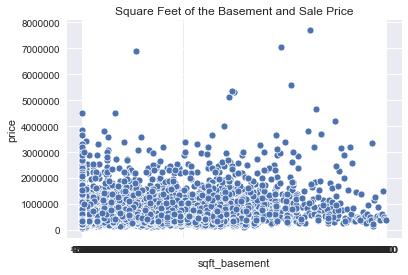

In [30]:
sns.scatterplot(x='sqft_basement', y='price', data=df).set(title='Square Feet of the Basement and Sale Price')

[Text(0.5, 1.0, 'Square Footage of the Home and Sale Price')]

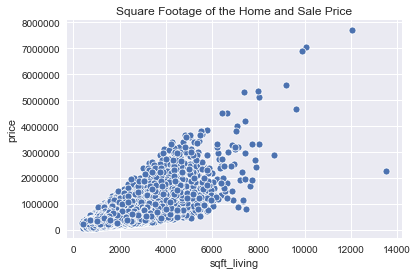

In [31]:
sns.scatterplot(x='sqft_living', y='price', data=df).set(title='Square Footage of the Home and Sale Price')

[Text(0.5, 1.0, 'Square Footage for Nearest 15 Neighbors and Sale Price')]

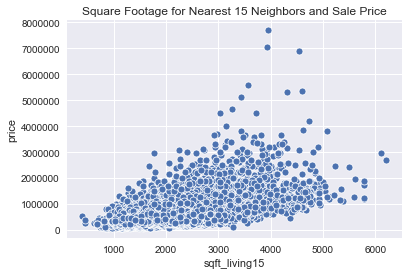

In [32]:
sns.scatterplot(x='sqft_living15', y='price', data=df).set(title='Square Footage for Nearest 15 Neighbors and Sale Price')

[Text(0.5, 1.0, 'Lot Size and Sale Price')]

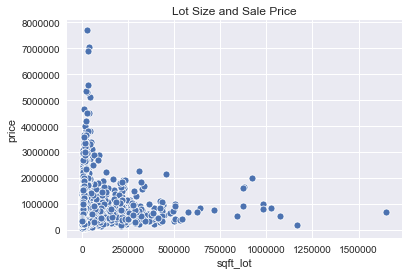

In [33]:
sns.scatterplot(x='sqft_lot', y='price', data=df).set(title='Lot Size and Sale Price')

[Text(0.5, 1.0, 'Lot Size of Neighbors and Sale Price')]

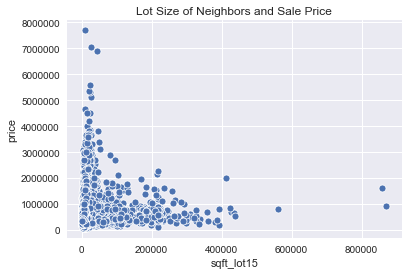

In [34]:
sns.scatterplot(x='sqft_lot15', y='price', data=df).set(title='Lot Size of Neighbors and Sale Price')

[Text(0.5, 1.0, 'Year Built and Sale Price')]

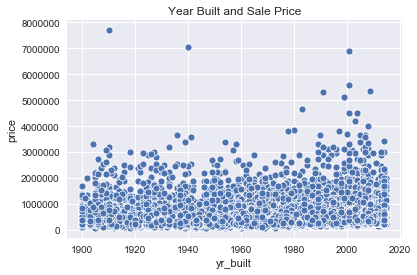

In [35]:
sns.scatterplot(x='yr_built', y='price', data=df).set(title='Year Built and Sale Price')

[Text(0.5, 1.0, 'Year Renovated and Sale Price')]

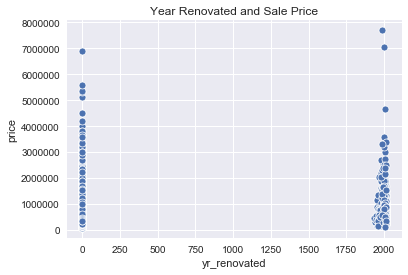

In [36]:
sns.scatterplot(x='yr_renovated', y='price', data=df).set(title='Year Renovated and Sale Price')

In [37]:
df['yr_renovated'].value_counts()

#There are too many 0 values to drop or replace so I will not be including this variable in my model

0.0       20853
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

### Q3: Answer

Square footage of the interior of the house, above the basement, and of the neighboors seem to have the best linear relationship with sales price. 

The number of bathrooms also seems to have some relation to price, but for the sake of this model, I will choose to exclude it.

### Building the Regression Model

In [39]:
#To check for multicollinearity, i'll create a new dataset without the target variable 
#I'll exclude date since it is not numeric

data_features = df.iloc[:,3:]
data_features.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [40]:
#Checking to see which variables have a high correlation

abs(data_features.corr()) > 0.75

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
bedrooms,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,True,True,False,False,False,False,False,True,True,False,False,False,False,False,True,False
sqft_lot,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
grade,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False,False
sqft_above,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False,False


In [41]:
#Sqft_living is definitely the most problematic feature and will be removed

#Grade and sqft_above are highly correlated with each other
#I will see with one is least correlated with price to determine which one I should drop

abs(df.corr())

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,0.016772,0.001150,0.005162,0.012241,0.131911,0.018608,0.003599,0.011772,0.023803,0.008188,0.010799,0.021617,0.010612,0.008211,0.001798,0.020672,0.002701,0.138557
price,0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.264306,0.393497,0.036056,0.667951,0.605368,0.053953,0.117855,0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,0.002127,0.078354,0.026496,0.356563,0.479386,0.155670,0.017900,0.154092,0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063629,0.186016,0.126479,0.665838,0.686668,0.507173,0.047177,0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.104637,0.281715,0.059445,0.762779,0.876448,0.318152,0.051060,0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,0.004814,0.021459,0.075054,0.008830,0.114731,0.184139,0.052946,0.004979,0.129586,0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,0.004814,1.000000,0.020797,0.028414,0.264075,0.458794,0.523989,0.489193,0.003793,0.059541,0.049239,0.125943,0.280102,0.010722
waterfront,0.003599,0.264306,0.002127,0.063629,0.104637,0.021459,0.020797,1.000000,0.380543,0.016648,0.082818,0.071778,0.024487,0.073939,0.028923,0.012157,0.037628,0.083823,0.030658
view,0.011772,0.393497,0.078354,0.186016,0.281715,0.075054,0.028414,0.380543,1.000000,0.045622,0.249082,0.166017,0.054452,0.090339,0.085059,0.006321,0.077702,0.278928,0.073083
condition,0.023803,0.036056,0.026496,0.126479,0.059445,0.008830,0.264075,0.016648,0.045622,1.000000,0.146896,0.158904,0.361592,0.055808,0.002888,0.015102,0.105877,0.093072,0.003126


In [42]:
#They are close, but I will not include sqft_above to remove multicollinearity from my dataset 

#Therefore, the features that remain to be included in my model are: 
#views, waterfront, grade, and sqft_living15

df_features = df.filter(['price', 'view','waterfront','grade', 'sqft_living15'], axis=1)
df_features.head()

,price,view,waterfront,grade,sqft_living15
0,221900.0,0.0,0.0,7,1340
1,538000.0,0.0,0.0,7,1690
2,180000.0,0.0,0.0,6,2720
3,604000.0,0.0,0.0,7,1360
4,510000.0,0.0,0.0,8,1800


In [43]:
formula = "price ~ view+waterfront+grade+sqft_living15"
model = ols(formula= formula, data=df_features).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     6184.
Date:                Tue, 04 Feb 2020   Prob (F-statistic):               0.00
Time:                        14:42:22   Log-Likelihood:            -2.9915e+05
No. Observations:               21597   AIC:                         5.983e+05
Df Residuals:                   21592   BIC:                         5.983e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -8.399e+05   1.22e+04    -68.958      0.000   -8.64e+05   -8.16e+05
view           8.023e+04   2510.984     31.952      0.000    7.53e+04    8.52e+04
waterfront     6.521e+05   2.25e+04     28.941      0.000    6.08e+05    6.96e+05
grade          1.523e+05   2083.279     73.095      0.000    1.48e+05    1.56e+05
sqft_living15    96.1334      3.598     26.719      0.000      89.081     103.186
==============================================================================
Omnibus:                    19005.308   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2099386.700
Skew:                           3.749   Prob(JB):                         0.00
Kurtosis:                      50.715   Cond. No.                     2.78e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.78e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
# The R-squared is a bit low so I'll try to remove waterfront and see if that improves the model

formula = "price ~ view+grade+sqft_living15"
model = ols(formula= formula, data=df_features).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     7669.
Date:                Tue, 04 Feb 2020   Prob (F-statistic):               0.00
Time:                        17:38:40   Log-Likelihood:            -2.9956e+05
No. Observations:               21597   AIC:                         5.991e+05
Df Residuals:                   21593   BIC:                         5.992e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -8.399e+05   1.24e+04    -67.655      0.000   -8.64e+05   -8.16e+05
view           1.073e+05   2375.480     45.156      0.000    1.03e+05    1.12e+05
grade          1.526e+05   2123.219     71.880      0.000    1.48e+05    1.57e+05
sqft_living15    93.8406      3.666     25.597      0.000      86.655     101.027
==============================================================================
Omnibus:                    19876.260   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2386887.144
Skew:                           4.021   Prob(JB):                         0.00
Kurtosis:                      53.870   Cond. No.                     1.52e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.52e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
#The R-squared worsened so I'll try to add a feature this time
#Bathrooms didn't make the first cut but it seems to have a linear relationship with price

df_features = df.filter(['price', 'bathrooms', 'view','waterfront','grade', 'sqft_living15'], axis=1)

formula = "price ~ bathrooms+view+waterfront+grade+sqft_living15"
model = ols(formula= formula, data=df_features).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     5080.
Date:                Tue, 04 Feb 2020   Prob (F-statistic):               0.00
Time:                        17:45:46   Log-Likelihood:            -2.9899e+05
No. Observations:               21597   AIC:                         5.980e+05
Df Residuals:                   21591   BIC:                         5.980e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -7.889e+05   1.24e+04    -63.436      0.000   -8.13e+05   -7.65e+05
bathrooms      5.288e+04   3003.468     17.607      0.000     4.7e+04    5.88e+04
view           8.028e+04   2493.208     32.198      0.000    7.54e+04    8.52e+04
waterfront     6.501e+05   2.24e+04     29.057      0.000    6.06e+05    6.94e+05
grade           1.34e+05   2315.076     57.870      0.000    1.29e+05    1.39e+05
sqft_living15    84.6912      3.631     23.324      0.000      77.574      91.809
==============================================================================
Omnibus:                    18507.122   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1851789.543
Skew:                           3.617   Prob(JB):                         0.00
Kurtosis:                      47.783   Cond. No.                     2.78e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.78e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Final Model

After adding bathrooms to the model, the R-squared improved slightly. This shows that the number of bathrooms, the number of times the house has been viewed, if the house is a waterfront property or not, the house's grade, and the square footage of the nearest 15 neighbors can predict the sales price of a house. This final R-squared is 0.541 which means that 54.1% of the variation in sales price can be explained by bathrooms, view, waterfrom, grade, and sqft_living15. 
    
The coefficients explain how the price changes as the other variables change.
- With each additional bathroom, the price of a house increases by 52,880 dollars on average. 
- If the house is a waterfront property, the price increases by 650,100 dollars on average.
- If the King County grade increases by 1, the price of the house increases by 134,000 dollars on average.
    